In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt
from heapq import nlargest, nsmallest
!pip install infomap
from infomap import Infomap

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1. Creating a directed graph.

In [3]:
G = nx.read_edgelist('/content/gdrive/MyDrive/connections.txt', create_using=nx.DiGraph(), nodetype=int)

2. Bridge nodes

In [4]:
betweenness = nx.betweenness_centrality(G)
max_betweenness = max(betweenness.values())
bridge = [i for i,j in betweenness.items() if j == max_betweenness]

In [5]:
print(bridge)

[1684]


We can see that there is only one bridgr node, which is 1684.

3. Density of the graph

In [6]:
vertices= G.number_of_nodes()
edges= G.number_of_edges()
density = (edges) / (vertices * (vertices - 1))

In [7]:
print(density)

0.0054099817517196435


As we can see, the density value is small, very close to 0, which indicates that the graph has relatively low density. It indocated that there are lots of nodes, however, out of all the edges between them that the graph could have had, it has only few of them.

4. Nodes with highest and lowest number of connections.

In [8]:
degrees = dict(G.degree())


# Node with the highest degree
node_with_max_degree = max(degrees, key=degrees.get)
highest_degree_node = max(G.nodes, key=G.degree)
d=G.degree(highest_degree_node)
print("Node with the highest degree: {} {}Degree: {}".format(highest_degree_node,'\n',d))

# Node with the lowest degree
node_with_min_degree = min(degrees, key=degrees.get)
lowest_degree_node = min(G.nodes, key=G.degree)
d=G.degree(lowest_degree_node)
print("Node with the lowest degree: {} {}Degree: {}".format(lowest_degree_node,'\n',d))

Node with the highest degree: 107 
Degree: 1045
Node with the lowest degree: 11 
Degree: 1


The total degree of a node is the sum of its in-degree and out-degree. If the nodes represent people, then the ones with high degree are valueable, as they have greater influence on the others thanks to their connections. On the other hand, the nodes with low degree are neither influenced much nor they influence a lot.

5. Nodes with highest incoming and outgoing connections.

In [9]:
in_degree = dict(G.in_degree())
highest_in_degree = max(in_degree, key=in_degree.get)
print(f" Node with highest incomming connections: {highest_in_degree}")

out_degree = dict(G.out_degree())
highest_out_degree = max(out_degree, key=out_degree.get)
print(f" Node with hishest outgoing connections : {highest_out_degree}")

 Node with highest incomming connections: 1888
 Node with hishest outgoing connections : 107


6. Nodes with highest closeness, betweenness, and eigenvector.

In [10]:
closeness_dict = nx.closeness_centrality(G)
max_closeness = max(closeness_dict.values())
max_closeness_nodes = [k for k,v in closeness_dict.items() if v == max_closeness]
print(f'Nodes with maximum closeness centrality: {max_closeness_nodes}')

Nodes with maximum closeness centrality: [2642]


In [11]:
betweenness_dict = nx.betweenness_centrality(G)
max_betweenness = max(betweenness_dict.values())
max_betweenness_nodes = [k for k,v in betweenness_dict.items() if v == max_betweenness]
print(f'Nodes with maximum betweenness centrality: {max_betweenness_nodes}')

Nodes with maximum betweenness centrality: [1684]


In [12]:
eigenvector_dict = nx.eigenvector_centrality(G, max_iter=500)
max_eigenvector = max(eigenvector_dict.values())
max_eigenvector_nodes = [k for k,v in eigenvector_dict.items() if v == max_eigenvector]
print(f'Nodes with maximum eigenvector centrality: {max_eigenvector_nodes}')

Nodes with maximum eigenvector centrality: [2655]


Interpretation:

The node 2642, having the highest closeness centrality, can aact like a central point in the community, having the ability to reach out to the other nodes easily, and have influence on them. They might be the factor that keeps the community alive, by facilitating communication within it.

The node with the highest betweenness centrality, 1684, is of crucial importance, as it is positioned in the largest amount of the shortest paths between other nodes. Thus, it acts like the mediator in the communication between those nodes, fostering the flow of information and connectiveness within the network.

The node with the highest eigenvector centrality, 2655, is connected to the nodes that are highly connected themselves. Thus, they not only have the quantity, but also the quality of their connections.

7. Community detection algorithm on the directed graph. Show how many communities were created.

In [13]:
def Communities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules

In [14]:
imap = Communities(G)
print(imap)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 93 communities with codelength: 6.596429348621003
93


As we can see, there are 93 communities.

8. Show the largest and the smallest community.

In [16]:
community_counts = {i:0 for i in range(1,94)}
for v, c in G.nodes.items():
    community_counts[c['community']] += 1
sorted_communities = {k: v for k,v in sorted(community_counts.items(), key=lambda item: item[1])}

smallest_community = next(iter(sorted_communities))
largest_community = next(reversed(sorted_communities))

In [17]:
print("Smallest community:", smallest_community)
print("Largest community:", largest_community)

Smallest community: 61
Largest community: 4


We have found the largest community. They might be of great importance for our company. Analyzing the demographics of these people we may answer to questions such as who our target audience is, who is most interested in our services or product, what kind of up-selling and cross-selling products they might be interested in, and what kind of campaigns we need to create to gain their loyalty and increase they value to the company. We might also try to involve other people into this community.

9. Draw the 3 largest communities.

In [18]:
print(sorted_communities)

{61: 1, 69: 2, 82: 2, 84: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 67: 3, 74: 3, 78: 3, 79: 3, 80: 3, 81: 3, 83: 3, 85: 3, 86: 3, 93: 3, 50: 4, 71: 4, 77: 4, 53: 5, 72: 5, 62: 6, 66: 6, 70: 6, 73: 6, 75: 6, 76: 6, 42: 7, 51: 7, 68: 7, 55: 8, 60: 8, 63: 8, 46: 9, 57: 9, 59: 9, 48: 10, 49: 10, 56: 10, 16: 12, 52: 12, 64: 12, 40: 13, 58: 13, 21: 14, 39: 14, 54: 14, 45: 15, 47: 15, 43: 16, 44: 18, 27: 19, 33: 19, 34: 19, 36: 19, 38: 19, 3: 20, 26: 21, 28: 21, 35: 22, 65: 22, 25: 25, 41: 25, 6: 27, 37: 29, 29: 30, 32: 32, 23: 34, 30: 36, 19: 38, 22: 49, 20: 52, 24: 54, 31: 57, 12: 73, 11: 89, 18: 111, 17: 137, 14: 141, 15: 149, 10: 164, 7: 167, 13: 199, 5: 226, 9: 235, 1: 237, 8: 238, 2: 336, 4: 471}


We can see that the communities 8, 2, 4 are the largest three.

In [19]:
comm_4 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 4)
comm_2 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)
comm_8 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 8)

In [20]:
sg_4 = G.subgraph(list(comm_4.keys()))
sg_2 = G.subgraph(list(comm_2.keys()))
sg_8 = G.subgraph(list(comm_8.keys()))

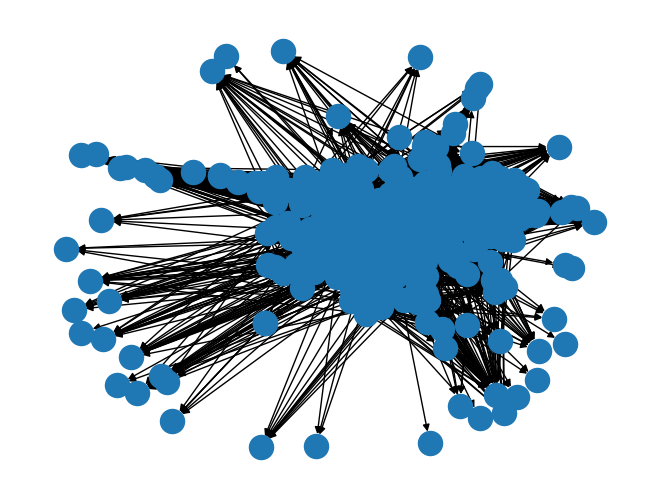

In [21]:
nx.draw(sg_4, pos=nx.spring_layout(sg_4))

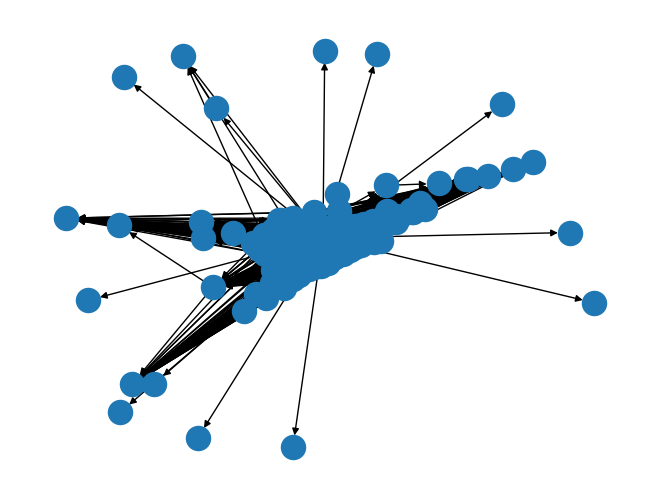

In [22]:
nx.draw(sg_2, pos=nx.spring_layout(sg_2))

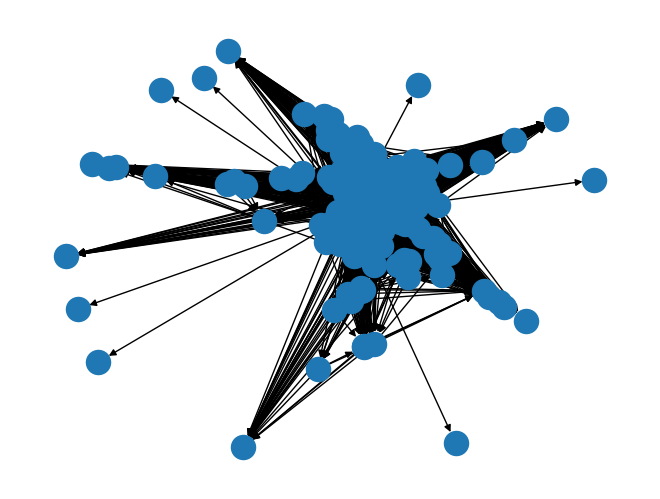

In [24]:
nx.draw(sg_8, pos=nx.spring_layout(sg_8))

11.

Let's take an arbitraty company, for instance, an airline. Considering the type of the company, we may take an arbitraty initial budget as 100000 dollars. The average adverticsement cost might be 50 dollars, which highly depends on what kind of advertisement it is.

It is essencial to use marketing techniques, and do the targeting wisely, not to spend money in unnecessery ways, and to increase our income. We can do so by targeting specific groups of people.

For instance, we can divide our cisomers into communities, and see which are the biggest communities, and what people there. We will try to analyze the demographics of those people, to understand what are the criteria for being in that community, thus, what are some ways to reach out to them and gain their interest.

Another important aspect is to understand who the most influencial people in those communities are. To do so, we can find the nodes with the greatest closeness centrality, to find the people who have a great amount of connections and can act like a communication hub, influencing ans spreading the information within those around them. We can find the people with the greatest betweenness centrality, who foster the connection and the flow of information within the community. We will also target the people with high wigenvector centrality, who have connections with both high quality and quantity.

targeting those people will help us increase the income of our company and create campaigns in a wise way.